## Поиск остовного дерева минимального веса на динамических графах

In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

##### Входные данные:
##### 1.	Связный граф не менее 50 вершин.
##### 2.	Веса ребер в диапазоне от 1 до 10 случайным образом.

In [138]:
G = nx.grid_2d_graph(10, 5)

for u, v in G.edges():
    G[u][v]['weight'] = random.randint(1, 10)

def draw_graph(name_graph, pos):

  nx.draw(name_graph, pos=pos, font_weight="medium", node_size=15, font_color="blue")
  edge_labels = nx.get_edge_attributes(name_graph, "weight")

  nx.draw_networkx_edge_labels(name_graph, pos=pos, edge_labels=edge_labels, font_color="red")
  plt.show()

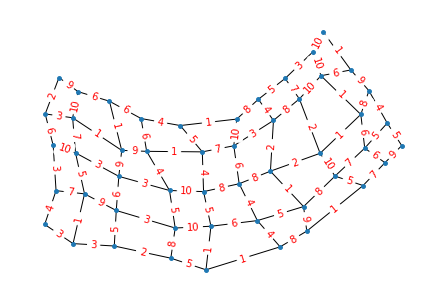

In [139]:
pos = nx.spring_layout(G)
draw_graph(G, pos)

### Задача 1.
##### 1.	Построить остовное дерево минимального веса на графе, используя алгоритм Краскала.
##### 2.	Визуализировать решение.


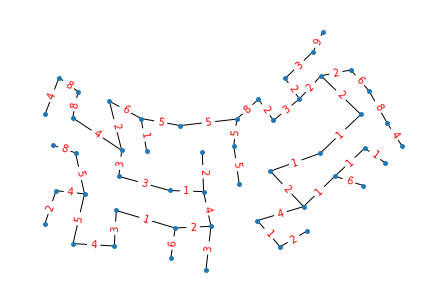

In [160]:
T = nx.minimum_spanning_tree(G)
draw_graph(T, pos)

Получившееся остовное дерево исключило по факту рёбра с максимальными значениями в 10, 9 и 8. Также отчасти отошли веса со значением 7, 6 и 5, что и решает задачу нахождения минимального остовного дерева по алгоритму Краскала.

### Задача 2.
##### 1.	Выбрать случайным образом 5 ребер графа и поменять их веса в диапазоне от 1 до 3. Построить остовное дерево минимального веса. Проверить как количественно и структурно изменилось решение.
##### 2.	Визуализировать изменение решения.


In [223]:
G2 = G.copy()

In [224]:
# Выбор 5 случайных ребер и изменение их весов
edges_to_change = random.sample(list(G2.edges()), 5)
for (u, v) in edges_to_change:
    G2[u][v]['weight'] = random.randint(1, 3)

# Построение остовного дерева минимального веса
T2 = nx.minimum_spanning_tree(G2)

# Проверка изменений
print(f'Исходный граф: {G2.number_of_edges()} ребер')
print(f'Остовное дерево: {T.number_of_edges()} ребер')

print(f'Ребра и веса исходного графа: {G2.edges.data("weight")}')
print(f'Ребра и веса остовного дерева: {T.edges.data("weight")}')

Исходный граф: 85 ребер
Остовное дерево: 49 ребер
Ребра и веса исходного графа: [((0, 0), (1, 0), 8), ((0, 0), (0, 1), 2), ((0, 1), (1, 1), 4), ((0, 1), (0, 2), 9), ((0, 2), (1, 2), 8), ((0, 2), (0, 3), 9), ((0, 3), (1, 3), 9), ((0, 3), (0, 4), 4), ((0, 4), (1, 4), 8), ((1, 0), (2, 0), 4), ((1, 0), (1, 1), 5), ((1, 1), (2, 1), 6), ((1, 1), (1, 2), 5), ((1, 2), (2, 2), 9), ((1, 2), (1, 3), 5), ((1, 3), (2, 3), 4), ((1, 3), (1, 4), 8), ((1, 4), (2, 4), 9), ((2, 0), (3, 0), 7), ((2, 0), (2, 1), 3), ((2, 1), (3, 1), 1), ((2, 1), (2, 2), 10), ((2, 2), (3, 2), 3), ((2, 2), (2, 3), 3), ((2, 3), (3, 3), 9), ((2, 3), (2, 4), 2), ((2, 4), (3, 4), 6), ((3, 0), (4, 0), 8), ((3, 0), (3, 1), 6), ((3, 1), (4, 1), 2), ((3, 1), (3, 2), 5), ((3, 2), (4, 2), 1), ((3, 2), (3, 3), 10), ((3, 3), (4, 3), 8), ((3, 3), (3, 4), 1), ((3, 4), (4, 4), 5), ((4, 0), (5, 0), 3), ((4, 0), (4, 1), 3), ((4, 1), (5, 1), 1), ((4, 1), (4, 2), 1), ((4, 2), (5, 2), 7), ((4, 2), (4, 3), 2), ((4, 3), (5, 3), 6), ((4, 3), (4, 4

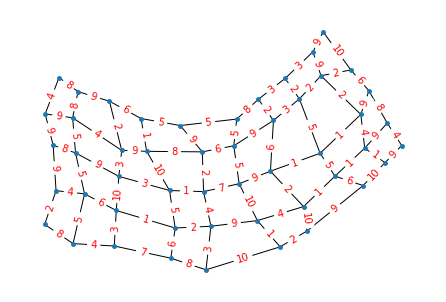

In [225]:
# первоначальный граф (входные данные)
draw_graph(G, pos)

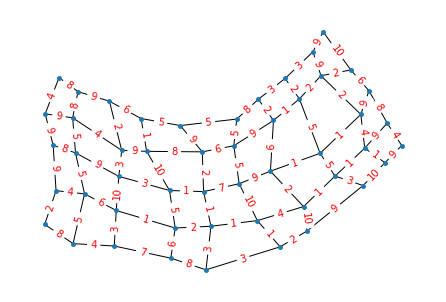

In [226]:
# граф, в котором рандомом у некоторых рёбер поменялись веса (задание 2)
draw_graph(G2, pos)

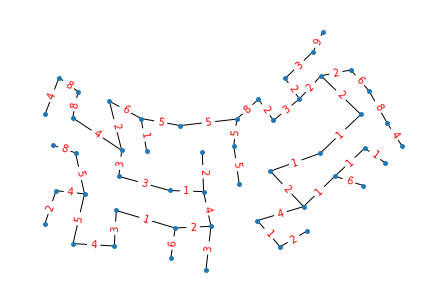

In [227]:
# остовное дерево на графе по входным данным (задание 1) 
draw_graph(T, pos)

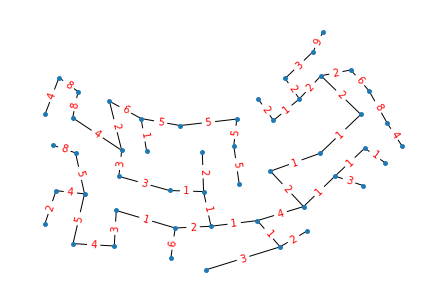

In [228]:
# остовное дерево на графе после преобразований в рамках задания 2
draw_graph(T2, pos)

Как можно увидеть на последних реализованных графах выше, изменение у рандомно выбранных ребёр графа G повлекло за собой структурное изменение остовного дерева T, что наглядно видно при сравнении результатов до и после выполнения задачи 2.

### Задача 3.
##### 1.	Провести 30 итераций задачи 2.
##### 2.	Построить график изменения количественного и структурного изменения.


In [229]:
def run_iterations(graph, iterations, random_change):
    results = []
    for i in range(iterations):
        # Выбор случайных ребер и изменение их весов
        random_edges = random.sample(list(graph.edges()), 5)
        for u, v in random_edges:
            graph[u][v]['weight'] = random.randint(random_change[0], random_change[1])

        # Построение остовного дерева минимального веса
        T = nx.minimum_spanning_tree(graph)

        # Расчет количественных изменений
        total_weight_before = sum(data['weight'] for _, _, data in graph.edges(data=True))
        total_weight_after = sum(data['weight'] for _, _, data in T.edges(data=True))
        weight_change = total_weight_after - total_weight_before

        # Расчет структурных изменений
        edges_before = set(graph.edges())
        edges_after = set(T.edges())
        added_edges = edges_after - edges_before
        removed_edges = edges_before - edges_after

        edges_changed = len(added_edges) - len(removed_edges)

        # Сохранение результатов
        results.append((total_weight_before, total_weight_after, weight_change, edges_changed))

    return results, T

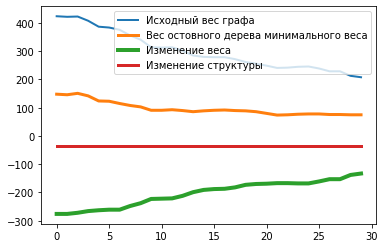

In [230]:
# Запуск 30 итераций
rand = (1, 3)
final = run_iterations(G2, 30, rand)
results = final[0]
T_new = final[1]

# Построение графика изменения количественных и структурных параметров
plt.plot(range(30), [r[0] for r in results], label="Исходный вес графа", linewidth=2)
plt.plot(range(30), [r[1] for r in results], label="Вес остовного дерева минимального веса", linewidth=3)
plt.plot(range(30), [r[2] for r in results], label="Изменение веса", linewidth=4)
plt.plot(range(30), [r[3] for r in results], label="Изменение структуры", linewidth=3)
plt.legend()
plt.show()

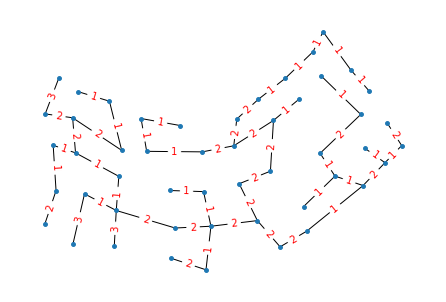

In [231]:
# остовное дерево после 30 итераций работы 2 задачи
draw_graph(T_new, pos)

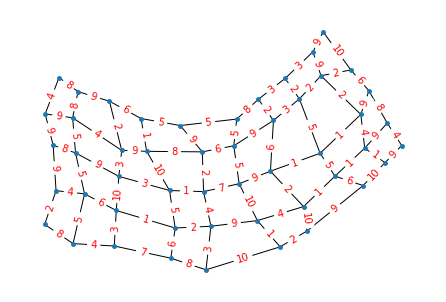

In [232]:
# изначальный граф
draw_graph(G, pos)

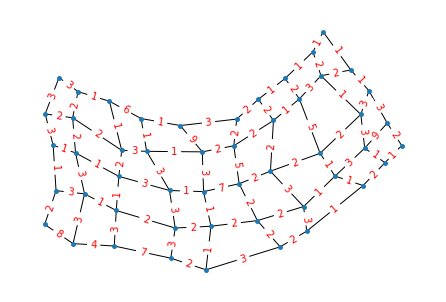

In [233]:
# граф после 2 задачи
draw_graph(G2, pos)

После проработки логики работы решения 2 задачи 30 раз наглядно видна динамика количественного изменения графа вниз (как весов исходного графа, так и весов остовного дерева). В свою очередь структурные изменения минимальны в дереве. По итогу в самом дереве остались веса, которые мы указывали в начале задания для изменения на рандомных 5 рёбрах в течение 30 итераций.

### Задача 4.
##### 1.	Решить Задачу 3, меняя диапазон изменения весов. Т.е. заменив диапазон от 1 до 3 на другой.
##### 2.	Провести сравнение (анализ) результатов с задачей 3.


In [234]:
G3 = G.copy()

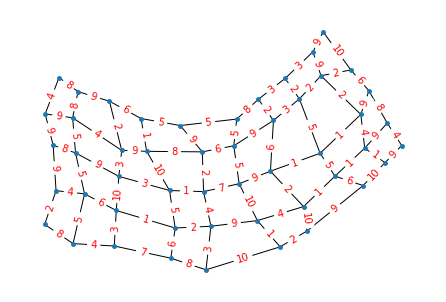

In [235]:
draw_graph(G3, pos)

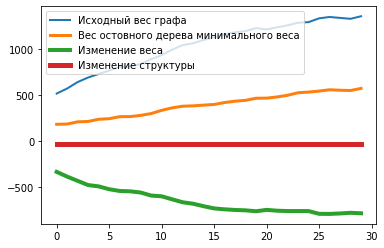

In [236]:
# Запуск 30 итераций

rand = (8, 28)
final = run_iterations(G3, 30, rand)
results = final[0]
T_new = final[1]

# Построение графика изменения количественных и структурных параметров
plt.plot(range(30), [r[0] for r in results], label="Исходный вес графа", linewidth=2)
plt.plot(range(30), [r[1] for r in results], label="Вес остовного дерева минимального веса", linewidth=3)
plt.plot(range(30), [r[2] for r in results], label="Изменение веса", linewidth=4)
plt.plot(range(30), [r[3] for r in results], label="Изменение структуры", linewidth=5)
plt.legend()
plt.show()

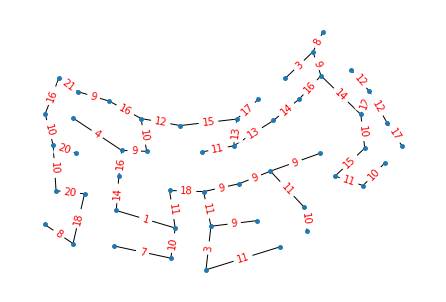

In [237]:
draw_graph(T_new, pos)

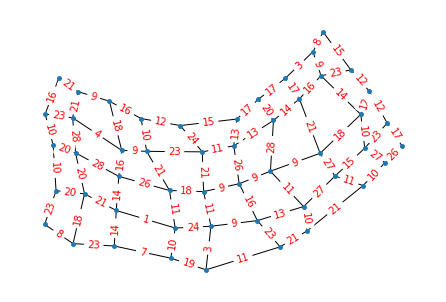

In [238]:
draw_graph(G3, pos)

Изменив по итогу диапазон изменения весов у графа, получаем резкое увеличение исходного веса графа и веса остовного дерева. При этом структурные изменения также чрезвычайно минимальны. Аналогичные изменения вышли и у итоговых весов остовного дерева с учётом весов, которые оказались меньше указанного перед работой диапазона значений весов.